<a href="https://colab.research.google.com/github/SurekhaBerlin/Roller-Coasters-Analysis/blob/main/RollercoasterEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ROLLERCOASTER EDA

## STEP 0 : Importing Libraries & Reading Data

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


In [79]:
df = pd.read_csv('/content/coaster_db.csv')

## STEP 1: Data Understanding

In [80]:
df.head(5)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [81]:
df.tail()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
1082,American Dreier Looping,"3,444 ft (1,050 m)",53 mph (85 km/h),Other,NaN,NaN,Steel,Anton Schwarzkopf,55 in (140 cm),NaN,...,53 mph,85 km/h,53.0,mph,53.0,111.0,ft,NaN,3,4.7
1083,Pantheon (roller coaster),"3,328 ft (1,014 m)",73 mph (117 km/h),Busch Gardens Williamsburg,Under construction,2022,Steel – Launched,Intamin,NaN,Blitz Coaster,...,73 mph,117 km/h,73.0,mph,73.0,178.0,ft,NaN,2,NaN
1084,Tron Lightcycle Power Run,"3,169.3 ft (966.0 m)",59.3[1] mph (95.4 km/h),Other,NaN,"June 16, 2016",Steel – Launched,Vekoma,4[2] ft (122 cm),Motorbike roller coaster,...,59.3 mph,95.4 km/h,59.3,mph,59.3,78.1,ft,NaN,0,4.0
1085,Tumbili,770 ft (230 m),34 mph (55 km/h),Kings Dominion,Under construction,NaN,Steel – 4th Dimension – Wing Coaster,S&S – Sansei Technologies,NaN,4D Free Spin,...,34 mph,55 km/h,34.0,mph,34.0,112.0,ft,NaN,0,NaN
1086,Wonder Woman Flight of Courage,"3,300 ft (1,000 m)",58 mph (93 km/h),Six Flags Magic Mountain,Under construction,2022,Steel – Single-rail,Rocky Mountain Construction,NaN,Raptor – Custom,...,58 mph,93 km/h,58.0,mph,58.0,131.0,ft,NaN,3,NaN


In [82]:
df.shape

(1087, 56)

In [83]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [84]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [86]:
print('Missing information: ', df.isnull().sum().sum())
print('Total information: ', len(df) * len(df.columns))

Missing information:  29435
Total information:  60872


## STEP 2:

1. Dropping irrelevant rows and columns
2. Identifying duplicated columns
3. Renaming columns
4. Feature Creation



In [87]:
# Droping unneccessary columns
df = df[['coaster_name',
    #'Length', 'Speed',
    'Location', 'Status',
    #'Opening date','Type',
    'Manufacturer',
    #'Height restriction', 'Model', 'Height','Inversions', 'Lift/launch system', 'Cost',
    #'Trains', 'Park section','Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
    #'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
    #'Track layout', 'Fastrack available', 'Soft opening date.1',
    #'Closing date', 'Opened', 'Replaced by', 'Website',
    #'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
    #'Single rider line available', 'Restraint Style',
    #'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
   'year_introduced', 'latitude', 'longitude', 'Type_Main','opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
    'speed_mph',
    # 'height_value', 'height_unit',
    'height_ft','Inversions_clean', 'Gforce_clean']].copy()

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Location            1087 non-null   object 
 2   Status              874 non-null    object 
 3   Manufacturer        1028 non-null   object 
 4   year_introduced     1087 non-null   int64  
 5   latitude            812 non-null    float64
 6   longitude           812 non-null    float64
 7   Type_Main           1087 non-null   object 
 8   opening_date_clean  837 non-null    object 
 9   speed_mph           937 non-null    float64
 10  height_ft           171 non-null    float64
 11  Inversions_clean    1087 non-null   int64  
 12  Gforce_clean        362 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 110.5+ KB


In [89]:
df.shape

(1087, 13)

In [90]:
# Changing the datatype
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'], errors='coerce')


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Status              874 non-null    object        
 3   Manufacturer        1028 non-null   object        
 4   year_introduced     1087 non-null   int64         
 5   latitude            812 non-null    float64       
 6   longitude           812 non-null    float64       
 7   Type_Main           1087 non-null   object        
 8   opening_date_clean  837 non-null    datetime64[ns]
 9   speed_mph           937 non-null    float64       
 10  height_ft           171 non-null    float64       
 11  Inversions_clean    1087 non-null   int64         
 12  Gforce_clean        362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), obje

In [92]:
# Rename our columns
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [93]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_Name     1087 non-null   object        
 1   Location         1087 non-null   object        
 2   Status           874 non-null    object        
 3   Manufacturer     1028 non-null   object        
 4   Year_Introduced  1087 non-null   int64         
 5   latitude         812 non-null    float64       
 6   longitude        812 non-null    float64       
 7   Type_Main        1087 non-null   object        
 8   Opening_Date     837 non-null    datetime64[ns]
 9   Speed_mph        937 non-null    float64       
 10  Height_ft        171 non-null    float64       
 11  Inversions       1087 non-null   int64         
 12  Gforce           362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 110.5+ KB


In [95]:
# Finding the null values
df.isnull().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [96]:
print('Missing information: ', df.isnull().sum().sum())
print('Total information: ', len(df) * len(df.columns))

Missing information:  2863
Total information:  14131


In [97]:
# Finding the duplicated
df.loc[df.duplicated()]

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


In [98]:
# Check for duplicate coaster name
df.loc[df.duplicated(subset=['Coaster_Name'])].head(5)

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN


In [99]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [100]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
    .reset_index(drop=True).copy()

## STEP 3: Feature Understanding
(Univariate analysis)

Plotting Feature Distributions



1. Histogram
2. KDE
3. Boxplot

In [101]:
df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1956     1
1959     1
1961     1
1895     1
1884     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

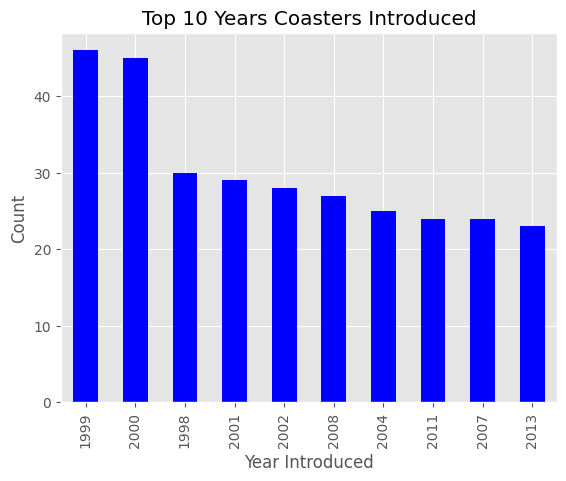

In [102]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar',color = 'Blue', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

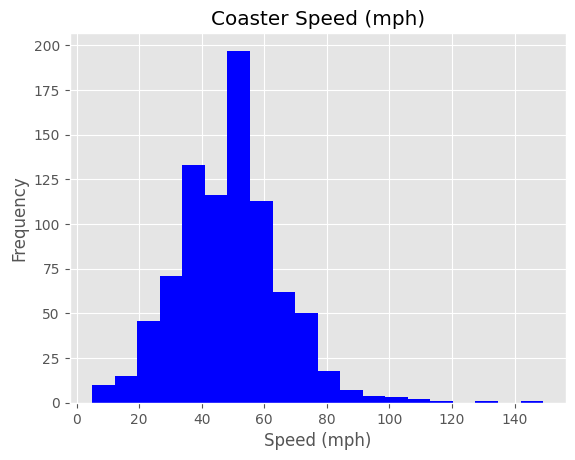

In [103]:
ax = df['Speed_mph'].plot(kind='hist',
                          bins=20,color = 'Blue',
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

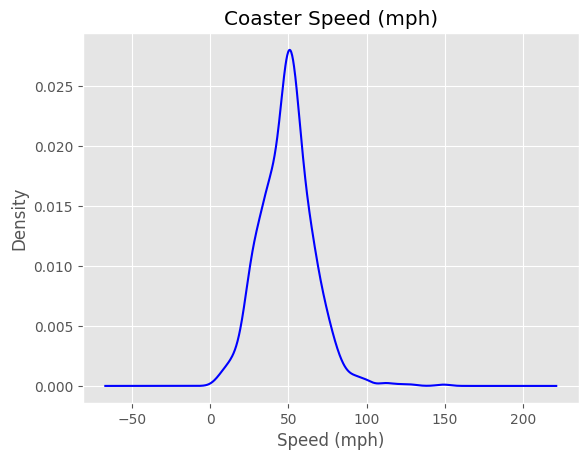

In [104]:
ax = df['Speed_mph'].plot(kind='kde',color = 'Blue',
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

In [105]:

df['Type_Main'].value_counts()

Type_Main
Steel    728
Wood     191
Other     71
Name: count, dtype: int64

## STEP 4: Feature Relationships

1. Scatterplot
2. Heatmap Correlation
3. Pairplot
4. Groupby comparisons

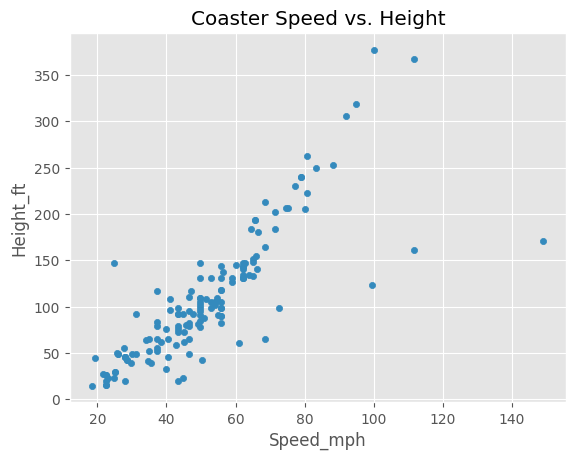

In [106]:
df.plot(kind='scatter',
        x='Speed_mph',
        y='Height_ft',
        title='Coaster Speed vs. Height')
plt.show()

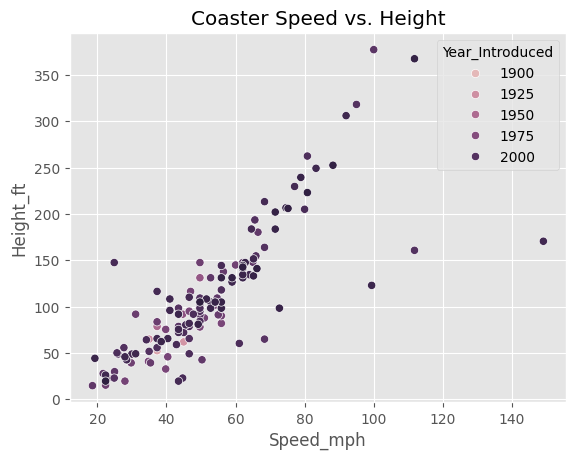

In [107]:
ax = sns.scatterplot(x='Speed_mph',
                y='Height_ft',
                hue='Year_Introduced',
                data=df)
ax.set_title('Coaster Speed vs. Height')
plt.show()

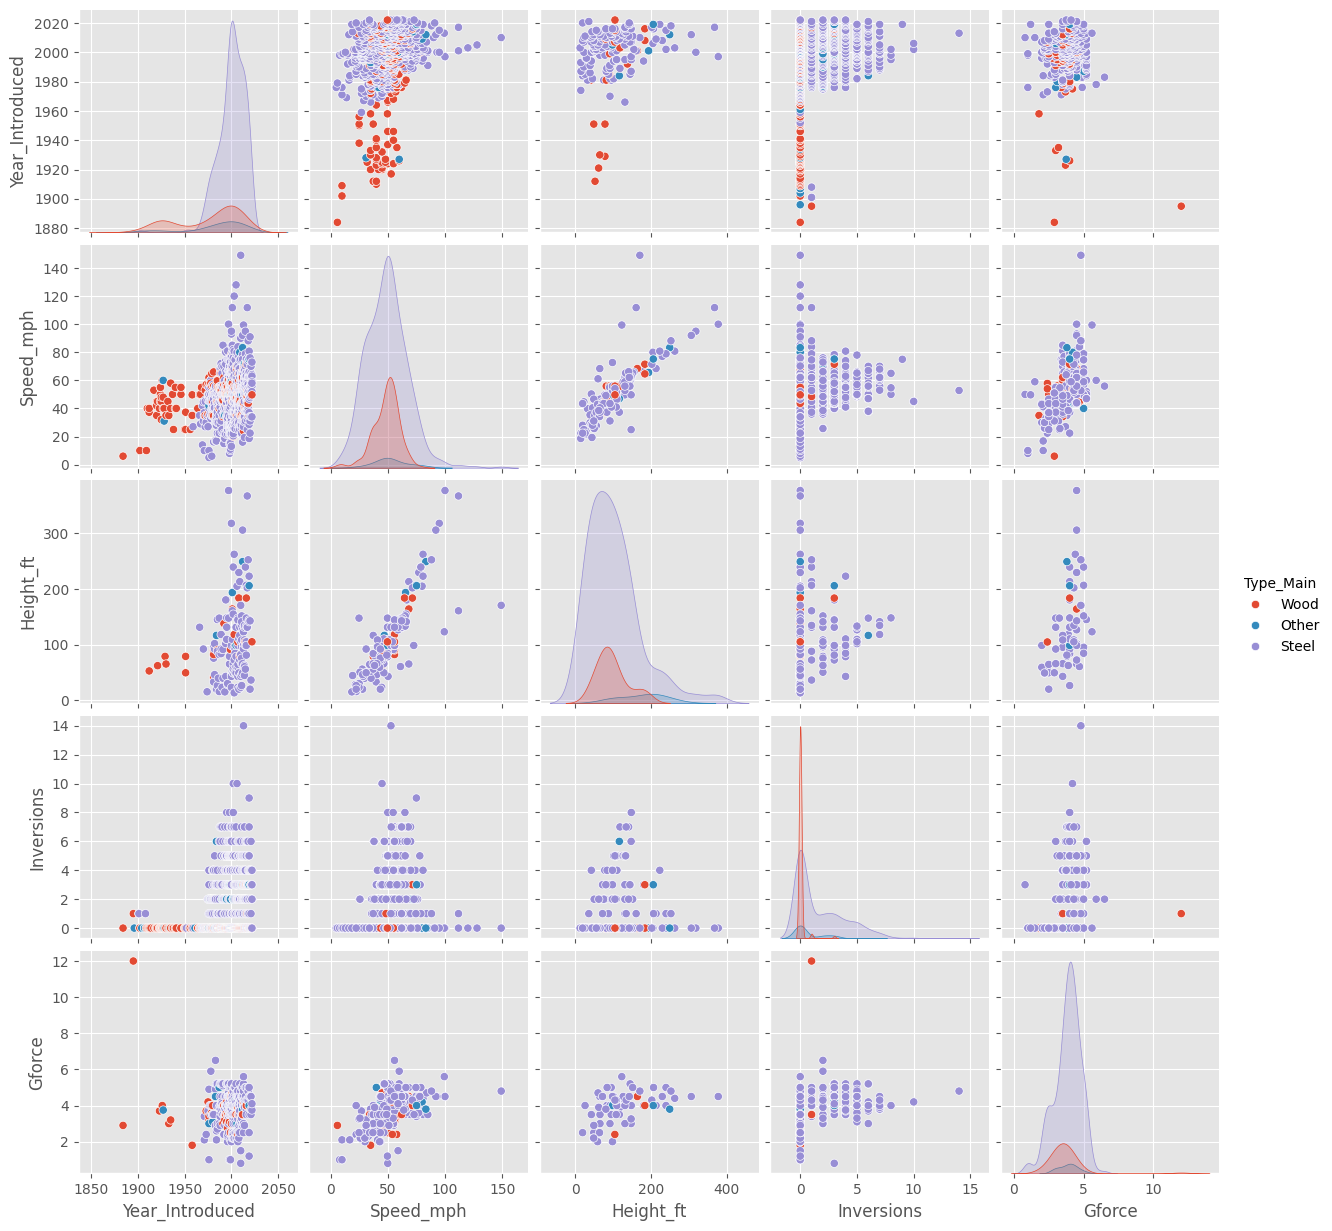

In [108]:
sns.pairplot(df,
             vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'],
            hue='Type_Main')
plt.show()

In [109]:
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

,Year_Introduced,Speed_mph,Height_ft,Inversions,Gforce
Year_Introduced,1.000000,0.171978,0.135413,-0.209887,0.160247
Speed_mph,0.171978,1.000000,0.733999,-0.028705,0.607383
Height_ft,0.135413,0.733999,1.000000,-0.079736,0.466482
Inversions,-0.209887,-0.028705,-0.079736,1.000000,0.275991
Gforce,0.160247,0.607383,0.466482,0.275991,1.000000


<Axes: >

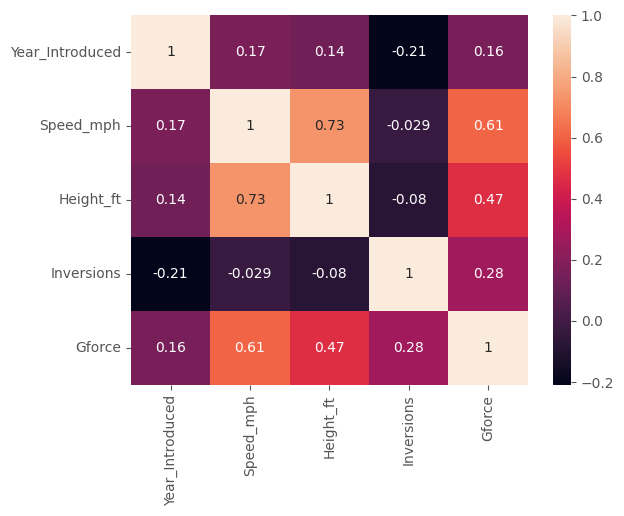

In [110]:
sns.heatmap(df_corr, annot=True)

## STEP 5: EDA

1. What are the top 10 roller coasters in Gforce?

In [111]:
top10_gforce = df.groupby("Coaster_Name")["Gforce"].max().dropna(how="any").sort_values()[-10:]

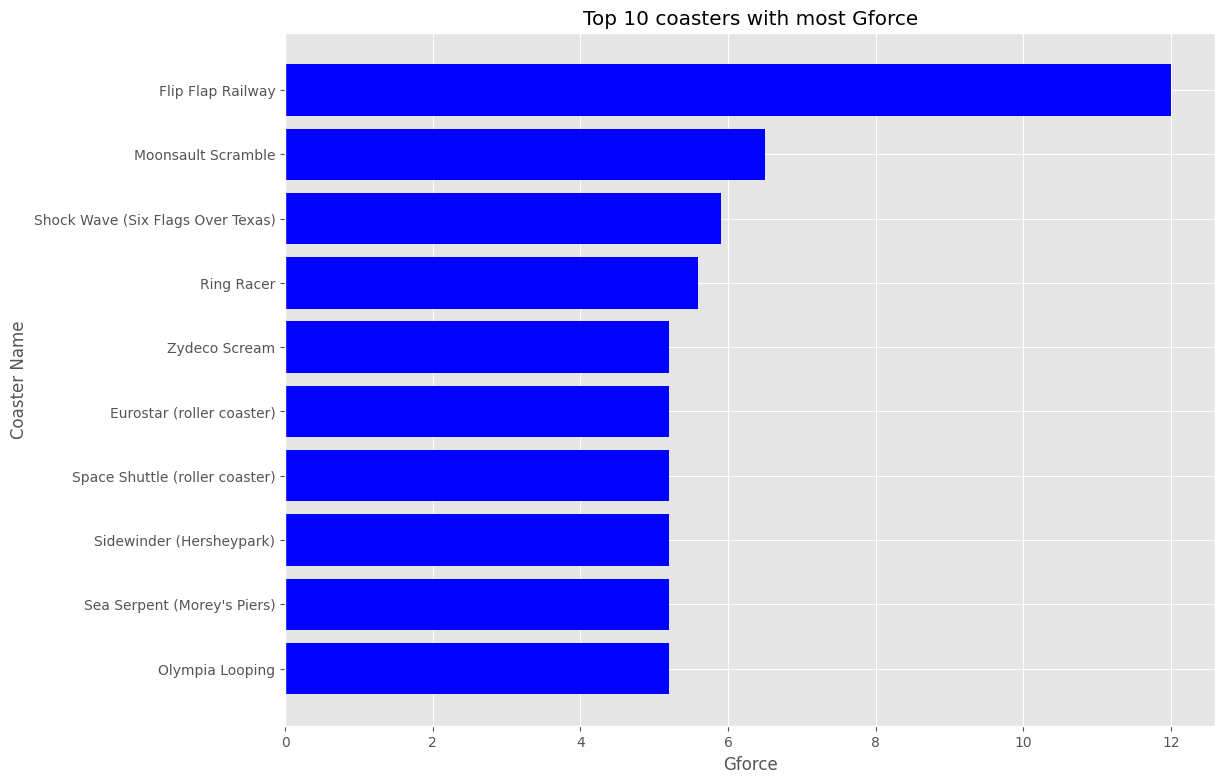

In [112]:
plt.figure(figsize=(12,9))

plt.barh(top10_gforce.index,top10_gforce,color="blue")


plt.title("Top 10 coasters with most Gforce")
plt.xlabel("Gforce")
plt.ylabel("Coaster Name")

plt.show()

2. What are the locations with the fastest roller coasters (minimum of 5)?

In [114]:
top5_gforce = df.groupby("Coaster_Name")["Gforce"].max().dropna(how="any").sort_values()[-5:]

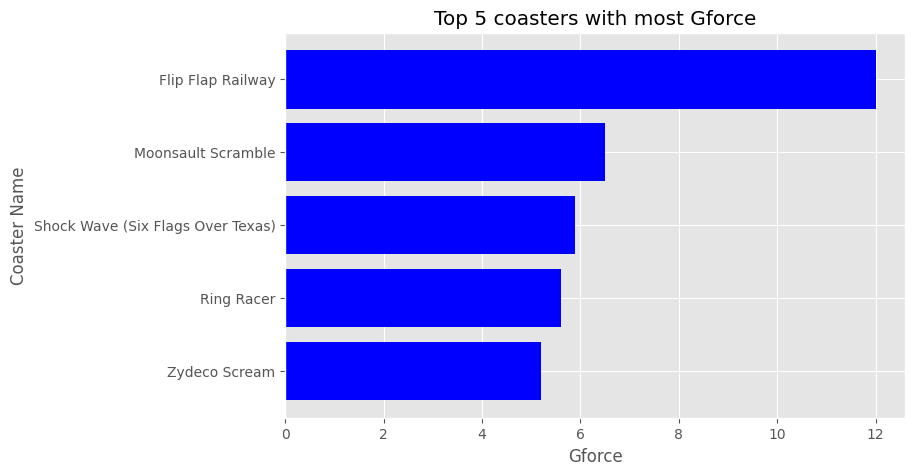

In [118]:
plt.figure(figsize=(8,5))

plt.barh(top5_gforce.index,top5_gforce,color="blue")


plt.title("Top 5 coasters with most Gforce")
plt.xlabel("Gforce")
plt.ylabel("Coaster Name")

plt.show()

3. plot of the Bottom 5 coasters with most Gforce

In [124]:
bottom5_gforce = df.groupby("Coaster_Name")["Gforce"].min().dropna(how="any").sort_values()[:5]

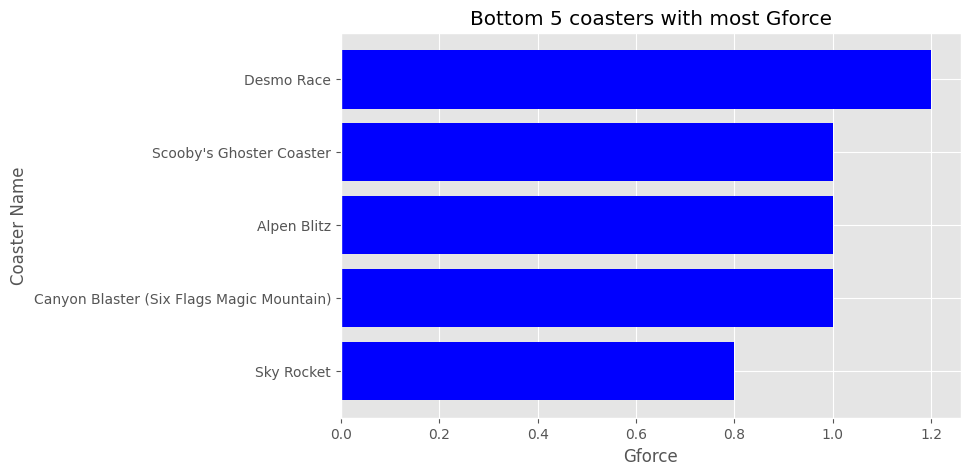

In [125]:
plt.figure(figsize=(8,5))

plt.barh(bottom5_gforce.index,bottom5_gforce,color="blue")


plt.title("Bottom 5 coasters with most Gforce")
plt.xlabel("Gforce")
plt.ylabel("Coaster Name")

plt.show()

4. Top 10 coasters with high speed

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_Name     990 non-null    object        
 1   Location         990 non-null    object        
 2   Status           844 non-null    object        
 3   Manufacturer     932 non-null    object        
 4   Year_Introduced  990 non-null    int64         
 5   latitude         783 non-null    float64       
 6   longitude        783 non-null    float64       
 7   Type_Main        990 non-null    object        
 8   Opening_Date     807 non-null    datetime64[ns]
 9   Speed_mph        850 non-null    float64       
 10  Height_ft        159 non-null    float64       
 11  Inversions       990 non-null    int64         
 12  Gforce           324 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 100.7+ KB


In [128]:
top10_speed = df.groupby("Coaster_Name")["Speed_mph"].max().dropna(how="any").sort_values()[-10:]

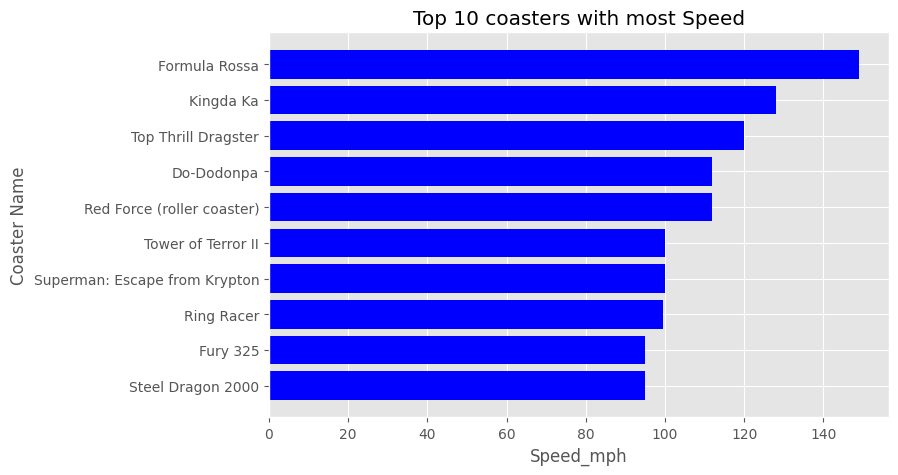

In [129]:
plt.figure(figsize=(8,5))

plt.barh(top10_speed.index,top10_speed,color="blue")


plt.title("Top 10 coasters with most Speed")
plt.xlabel("Speed_mph")
plt.ylabel("Coaster Name")

plt.show()